In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import nltk
df = pd.read_csv("job_postings.csv")

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
#%pip install seaborn
import seaborn as sns

In [4]:
df.head()


,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,1708301126000,NaN,NaN,NaN,1692749193000,NaN,1,FULL_TIME,USD,BASE_SALARY
1,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,1695426553000,NaN,NaN,NaN,1692834553000,NaN,0,FULL_TIME,NaN,NaN
2,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,NaN,NaN,NaN,NaN,Contract,"New York, NY",...,1695321872000,NaN,NaN,NaN,1692729872000,NaN,0,CONTRACT,NaN,NaN
3,381055942,96654609.0,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,NaN,NaN,NaN,NaN,Full-time,"Forney, TX",...,1695424007000,NaN,NaN,NaN,1692832007000,NaN,0,FULL_TIME,NaN,NaN
4,529257371,1244539.0,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,NaN,NaN,NaN,NaN,Full-time,"New York, NY",...,1708419602000,NaN,NaN,NaN,1692867714000,NaN,1,FULL_TIME,NaN,NaN


Text(0, 0.5, '')

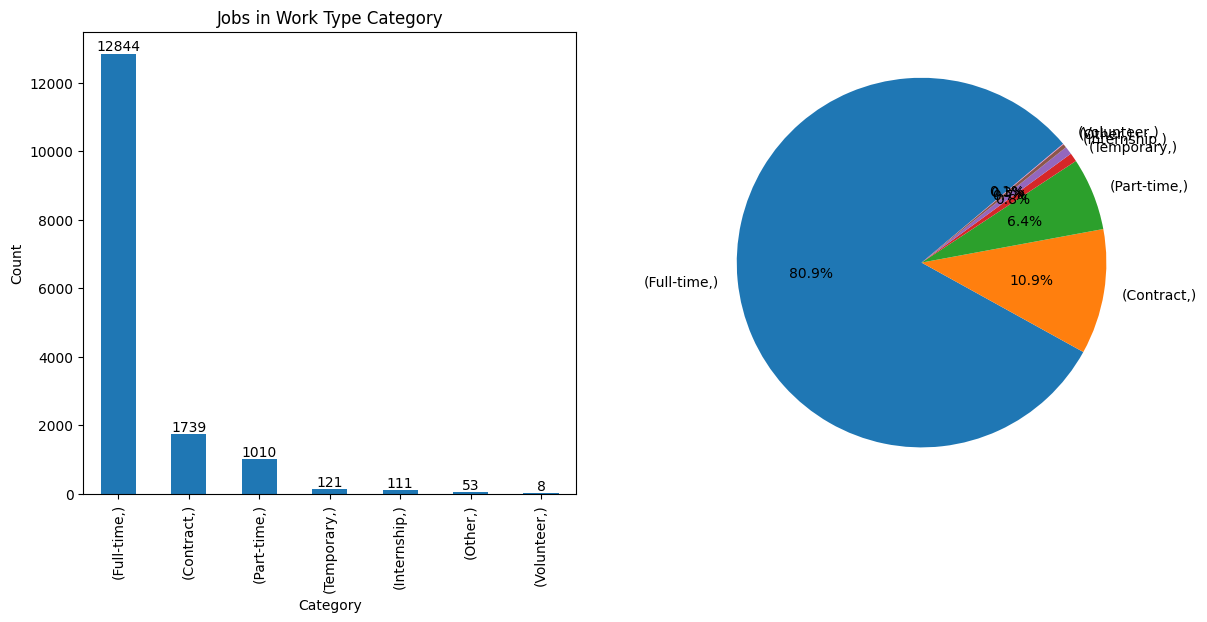

In [9]:
fig, axes = plt.subplots(1,2,figsize=(14, 6))

work_type = df.value_counts(["formatted_work_type"])
bars = work_type.plot(kind='bar', ax=axes[0])
axes[0].set_title('Jobs in Work Type Category')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Count')
# Annotate each bar with its value
for i, value in enumerate(work_type):
    bars.text(i, value + 0.1, str(value), ha='center', va='bottom')
    
    
bars = work_type.plot(kind='pie', autopct='%1.1f%%', startangle=40, ax=axes[1])
axes[1].set_ylabel('')



In [10]:
print(len(df))
df.value_counts(["formatted_work_type"])

15886


formatted_work_type
Full-time              12844
Contract                1739
Part-time               1010
Temporary                121
Internship               111
Other                     53
Volunteer                  8
Name: count, dtype: int64

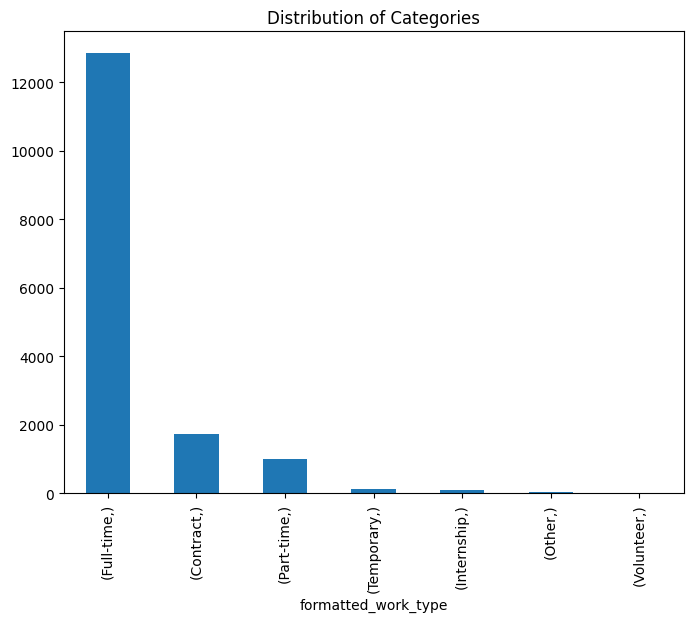

In [11]:
value_counts=df.value_counts(["formatted_work_type"])
#plt.pie(df.value_counts(["formatted_work_type"]))
# Plotting a pie chart
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar')
plt.title('Distribution of Categories')

plt.show()

## Let's Add the Company Data and build a more complete data frame.

In [12]:
df_company = pd.read_csv("company_details/companies.csv")
df_sectors = pd.read_csv("company_details/company_industries.csv")
df_employee = pd.read_csv("company_details/employee_counts.csv")
df_specialties = pd.read_csv("company_details/company_specialities.csv")

memory = df_company.memory_usage(deep=True).sum() / (1024 * 1024)  # Convert bytes to megabytes
print(f"Memory usage of the DataFrame: {memory:.2f} MB")
print(len(df))

Memory usage of the DataFrame: 11.57 MB
15886


In [13]:
df_company.head()

,company_id,name,description,company_size,state,country,city,zip_code,address,url
0,1009,IBM,"At IBM, we do more than work. We create. We cr...",7.0,NY,US,"Armonk, New York",10504,International Business Machines Corp.,https://www.linkedin.com/company/ibm
1,1016,GE HealthCare,Every day millions of people feel the impact o...,7.0,0,US,Chicago,0,-,https://www.linkedin.com/company/gehealthcare
2,1021,GE Power,"GE Power, part of GE Vernova, is a world energ...",7.0,NY,US,Schenectady,12345,1 River Road,https://www.linkedin.com/company/gepower
3,1025,Hewlett Packard Enterprise,Official LinkedIn of Hewlett Packard Enterpris...,7.0,Texas,US,Houston,77389,1701 E Mossy Oaks Rd Spring,https://www.linkedin.com/company/hewlett-packa...
4,1028,Oracle,We’re a cloud technology company that provides...,7.0,Texas,US,Austin,78741,2300 Oracle Way,https://www.linkedin.com/company/oracle


In [14]:
df_employee.head()
companytest = df_employee[df_employee["company_id"]==1028]
df_company.merge(companytest, left_on='company_id', right_on='company_id')

,company_id,name,description,company_size,state,country,city,zip_code,address,url,employee_count,follower_count,time_recorded
0,1028,Oracle,We’re a cloud technology company that provides...,7.0,Texas,US,Austin,78741,2300 Oracle Way,https://www.linkedin.com/company/oracle,202019,9289332,1.692861e+09
1,1028,Oracle,We’re a cloud technology company that provides...,7.0,Texas,US,Austin,78741,2300 Oracle Way,https://www.linkedin.com/company/oracle,202050,9289574,1.692867e+09
2,1028,Oracle,We’re a cloud technology company that provides...,7.0,Texas,US,Austin,78741,2300 Oracle Way,https://www.linkedin.com/company/oracle,202050,9289583,1.692867e+09


In [15]:
df_all = df_company.merge(df_employee, left_on='company_id', right_on='company_id')
df_all = df_all.drop_duplicates(subset=['company_id'])
df_all.head()

,company_id,name,description,company_size,state,country,city,zip_code,address,url,employee_count,follower_count,time_recorded
0,1009,IBM,"At IBM, we do more than work. We create. We cr...",7.0,NY,US,"Armonk, New York",10504,International Business Machines Corp.,https://www.linkedin.com/company/ibm,316130,16114398,1.692851e+09
16,1016,GE HealthCare,Every day millions of people feel the impact o...,7.0,0,US,Chicago,0,-,https://www.linkedin.com/company/gehealthcare,53495,2060378,1.692853e+09
44,1021,GE Power,"GE Power, part of GE Vernova, is a world energ...",7.0,NY,US,Schenectady,12345,1 River Road,https://www.linkedin.com/company/gepower,26963,2340835,1.692866e+09
45,1025,Hewlett Packard Enterprise,Official LinkedIn of Hewlett Packard Enterpris...,7.0,Texas,US,Houston,77389,1701 E Mossy Oaks Rd Spring,https://www.linkedin.com/company/hewlett-packa...,70995,3646359,1.692840e+09
46,1028,Oracle,We’re a cloud technology company that provides...,7.0,Texas,US,Austin,78741,2300 Oracle Way,https://www.linkedin.com/company/oracle,202019,9289332,1.692861e+09


In [16]:
df_sectors_unique = df_sectors.drop_duplicates( subset=['company_id'])
df_sectors_unique[ df_sectors_unique['company_id']==1009]

,company_id,industry
8486,1009,Information Technology & Services


In [17]:
df_all.columns
df_all = df_all.merge(df_sectors_unique, left_on='company_id', right_on='company_id')
df_all.head()
#df_all = df_all.merge(df_specialties, left_on='company_id', right_on='company_id')

,company_id,name,description,company_size,state,country,city,zip_code,address,url,employee_count,follower_count,time_recorded,industry
0,1009,IBM,"At IBM, we do more than work. We create. We cr...",7.0,NY,US,"Armonk, New York",10504,International Business Machines Corp.,https://www.linkedin.com/company/ibm,316130,16114398,1.692851e+09,Information Technology & Services
1,1016,GE HealthCare,Every day millions of people feel the impact o...,7.0,0,US,Chicago,0,-,https://www.linkedin.com/company/gehealthcare,53495,2060378,1.692853e+09,Hospital & Health Care
2,1021,GE Power,"GE Power, part of GE Vernova, is a world energ...",7.0,NY,US,Schenectady,12345,1 River Road,https://www.linkedin.com/company/gepower,26963,2340835,1.692866e+09,Renewables & Environment
3,1025,Hewlett Packard Enterprise,Official LinkedIn of Hewlett Packard Enterpris...,7.0,Texas,US,Houston,77389,1701 E Mossy Oaks Rd Spring,https://www.linkedin.com/company/hewlett-packa...,70995,3646359,1.692840e+09,Information Technology & Services
4,1028,Oracle,We’re a cloud technology company that provides...,7.0,Texas,US,Austin,78741,2300 Oracle Way,https://www.linkedin.com/company/oracle,202019,9289332,1.692861e+09,Information Technology & Services


In [18]:
df_specialties.head(30)

,company_id,speciality
0,81149246,Childrens Music Education
1,81149246,Foundational Music Theory
2,81149246,Child Music Lessons
3,81149246,social emotional learning
4,81149246,social emotional development
5,81149246,education
6,81149246,formative assessment
7,81149246,expanded learning
8,81149246,enrichment programs
9,10033339,SharePoint


## Here we want to agreggate the specialties into a new dictionary

In [19]:
company_specialty_dict = {}

for row in df_specialties.iterrows():
    if( row[1]['company_id'] in company_specialty_dict.keys() ):
       company_specialty_dict[row[1]['company_id']] +=', '+row[1]['speciality'] 
    else:
       company_specialty_dict[row[1]['company_id']] =row[1]['speciality'] 
    
#print(company_specialty_dict)
df_aggregated_specialty = pd.DataFrame(company_specialty_dict.items(),  columns=['company_id', 'specialty'])
df_aggregated_specialty.head()

,company_id,specialty
0,81149246,"Childrens Music Education, Foundational Music ..."
1,10033339,"SharePoint, Office 365, Consulting, Project ma..."
2,6049228,"Accounting, Accounts Payable, Treasury Managem..."
3,2641066,"Solenoids, DURO-TECH Solenoids, Custom Solenoi..."
4,82684341,"Dry eyes, Primary care, Children's Eye Exams, ..."


In [20]:
df_company_all = df_all.merge(df_aggregated_specialty, left_on='company_id', right_on='company_id')
df_company_all.head(1)

,company_id,name,description,company_size,state,country,city,zip_code,address,url,employee_count,follower_count,time_recorded,industry,specialty
0,1009,IBM,"At IBM, we do more than work. We create. We cr...",7.0,NY,US,"Armonk, New York",10504,International Business Machines Corp.,https://www.linkedin.com/company/ibm,316130,16114398,1.692851e+09,Information Technology & Services,"Cloud, Mobile, Cognitive, Security, Research, ..."


# marry the company data to the jobs

In [21]:
pd.set_option('display.max_colwidth', None)  # Show full column content without truncation
pd.set_option('display.max_columns', None)   # Show all columns without truncation

bigdata = df.merge(df_company_all, left_on='company_id', right_on='company_id', how='left')

# rename industry
bigdata.rename(columns={'industry_x': 'industry'}, inplace=True)
#bigdata.drop('industry_y', axis=1, inplace=True)

In [22]:
bigdata.columns

Index(['job_id', 'company_id', 'title', 'description_x', 'max_salary',
       'med_salary', 'min_salary', 'pay_period', 'formatted_work_type',
       'location', 'applies', 'original_listed_time', 'remote_allowed',
       'views', 'job_posting_url', 'application_url', 'application_type',
       'expiry', 'closed_time', 'formatted_experience_level', 'skills_desc',
       'listed_time', 'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type', 'name', 'description_y', 'company_size', 'state',
       'country', 'city', 'zip_code', 'address', 'url', 'employee_count',
       'follower_count', 'time_recorded', 'industry', 'specialty'],
      dtype='object')

In [23]:
bigdata.head()[ ['title','name','job_posting_url']]


,title,name,job_posting_url
0,Licensed Insurance Agent,NaN,https://www.linkedin.com/jobs/view/85008768/?trk=jobs_biz_prem_srch
1,Sales Manager,CargoLogin.,https://www.linkedin.com/jobs/view/133114754/?trk=jobs_biz_prem_srch
2,Model Risk Auditor,NaN,https://www.linkedin.com/jobs/view/133196985/?trk=jobs_biz_prem_srch
3,Business Manager,NaN,https://www.linkedin.com/jobs/view/381055942/?trk=jobs_biz_prem_srch
4,NY Studio Assistant,NaN,https://www.linkedin.com/jobs/view/529257371/?trk=jobs_biz_prem_srch


In [24]:
bigdata.head()[ ['job_posting_url']]

,job_posting_url
0,https://www.linkedin.com/jobs/view/85008768/?trk=jobs_biz_prem_srch
1,https://www.linkedin.com/jobs/view/133114754/?trk=jobs_biz_prem_srch
2,https://www.linkedin.com/jobs/view/133196985/?trk=jobs_biz_prem_srch
3,https://www.linkedin.com/jobs/view/381055942/?trk=jobs_biz_prem_srch
4,https://www.linkedin.com/jobs/view/529257371/?trk=jobs_biz_prem_srch


# Who is hiring the most positions?

In [25]:
memory = bigdata.memory_usage(deep=True).sum() / (1024 * 1024)  # Convert bytes to megabytes
print(f"Memory usage of the DataFrame: {memory:.2f} MB")
#bigdata.info()
#df.info()

Memory usage of the DataFrame: 181.27 MB


# Show the distribution of NaNs or Nones / Nulls

In [26]:
nan_counts = bigdata.isna().sum()
print(nan_counts)
bigdata.sample(1)['title']

job_id                            0
company_id                      366
title                             0
description_x                     1
max_salary                    10365
med_salary                    14905
min_salary                    10365
pay_period                     9384
formatted_work_type               0
location                          0
applies                        7186
original_listed_time              0
remote_allowed                13546
views                          2763
job_posting_url                   0
application_url                6091
application_type                  0
expiry                            0
closed_time                   14958
formatted_experience_level     4902
skills_desc                   15742
listed_time                       0
posting_domain                 6842
sponsored                         0
work_type                         0
currency                       9384
compensation_type              9384
name                        

11107    Manager, Salesforce Platform
Name: title, dtype: object

In [28]:
# # Counting words in each cell
# counts = pd.DataFrame()
# counts['word_count'] = bigdata['description_x'].str.split().apply(len)

# # Summing up the word counts
# total_word_count = counts['word_count'].sum()

# print("Total word count:", total_word_count)

# bigdata.sample(1)['job_id']

In [29]:
# lets write this to a csv for LLM processing
import csv
csv_set = bigdata[[ 'title','job_id','name','work_type','max_salary', 'remote_allowed', 'skills_desc', 'company_size', 'industry', 'description_x']]
print("The size is " , len(csv_set) )
csv_set.to_csv('big_job_data.csv', index=False, quoting=csv.QUOTE_ALL, encoding='utf-8')

The size is  15886


# OK this discrepancy means we have lost some jobs in the join,   we need to keep all on the left even NaN for company Id

In [30]:
bigdata[bigdata['country'].isna()].sample(10)[ ['name','title','location','country'  ]]

,name,title,location,country
439,NaN,Store Manager,"Lexington, SC",NaN
2575,NaN,"Supervisor, Programmatic",Los Angeles Metropolitan Area,NaN
50,NaN,Account Executive,"Mesa, AZ",NaN
9149,NaN,"tech 1, Installation","Groton, CT",NaN
7066,NaN,Temp: Painter II (Maintenance),"Annapolis, MD",NaN
8541,NaN,Business Integrity Analyst - Hybrid - Greater Chicago Area,"Morton Grove, IL",NaN
14225,NaN,Production Surface Prep 1st Shift,"Ashland City, TN",NaN
3938,NaN,Machine Perfusion Specialist,"San Ramon, CA",NaN
12649,NaN,Sales Manager,"Quincy, IL",NaN
1507,NaN,Secretary,"Georgia, United States",NaN


# lets have a look at eh canadian jobs 

In [31]:
canadian_jobs = bigdata[  (bigdata['location'].str.contains('Newport'))   ]
len(canadian_jobs)

25

In [32]:
canadian_jobs[ ['name', 'location', 'country'] ]

,name,location,country
83,Saje Natural Wellness,"Newport Beach, CA",CA
817,Roth Staffing,"Newport Beach, CA",US
1328,Innova Solutions,"Newport News, VA",US
1551,NaN,"Newport, AR",NaN
1800,NaN,"Newport, AR",NaN
2265,Genpact,"Newport Beach, CA",US
3691,ATEL,"Newport Beach, CA",US
4313,Insight Global,"Newport Beach, CA",US
4506,Walmart,"Newport News, VA",US
4732,Chipotle Mexican Grill,"Newport Beach, CA",US


In [33]:
job_countries = bigdata['country'].value_counts()
job_countries


country
US    11367
GB      306
CA      143
IN       84
0        78
DE       69
CH       52
IE       36
FR       31
DK       25
NL       23
OO       18
SE       16
SG       15
AU       14
CN       12
SA       11
BE       10
IT        9
TW        8
FI        7
IL        6
HR        6
NO        5
ES        5
AT        4
MX        4
BM        4
KR        3
HK        3
JP        3
NZ        2
IS        2
AE        2
LU        1
VN        1
TR        1
KE        1
Name: count, dtype: int64

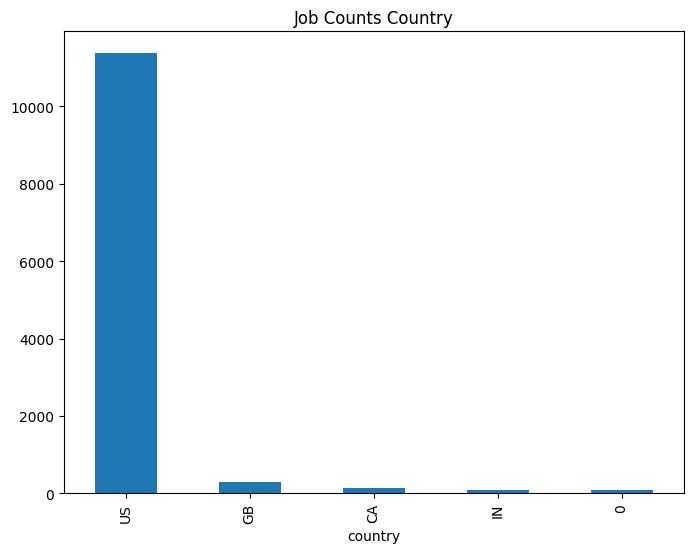

In [34]:


plt.figure(figsize=(8, 6))
job_countries.head(5).plot(kind='bar')
plt.title('Job Counts Country')

plt.show()

Index(['job_id', 'company_id', 'title', 'description_x', 'max_salary',
       'med_salary', 'min_salary', 'pay_period', 'formatted_work_type',
       'location', 'applies', 'original_listed_time', 'remote_allowed',
       'views', 'job_posting_url', 'application_url', 'application_type',
       'expiry', 'closed_time', 'formatted_experience_level', 'skills_desc',
       'listed_time', 'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type', 'name', 'description_y', 'company_size', 'state',
       'country', 'city', 'zip_code', 'address', 'url', 'employee_count',
       'follower_count', 'time_recorded', 'industry', 'specialty'],
      dtype='object')
10956


Text(0, 0.5, '')

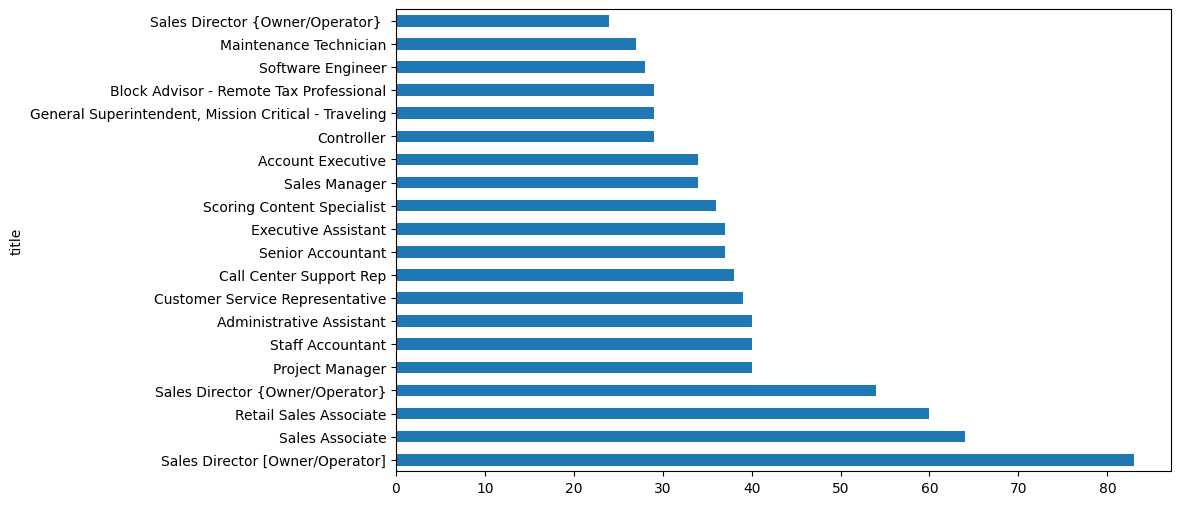

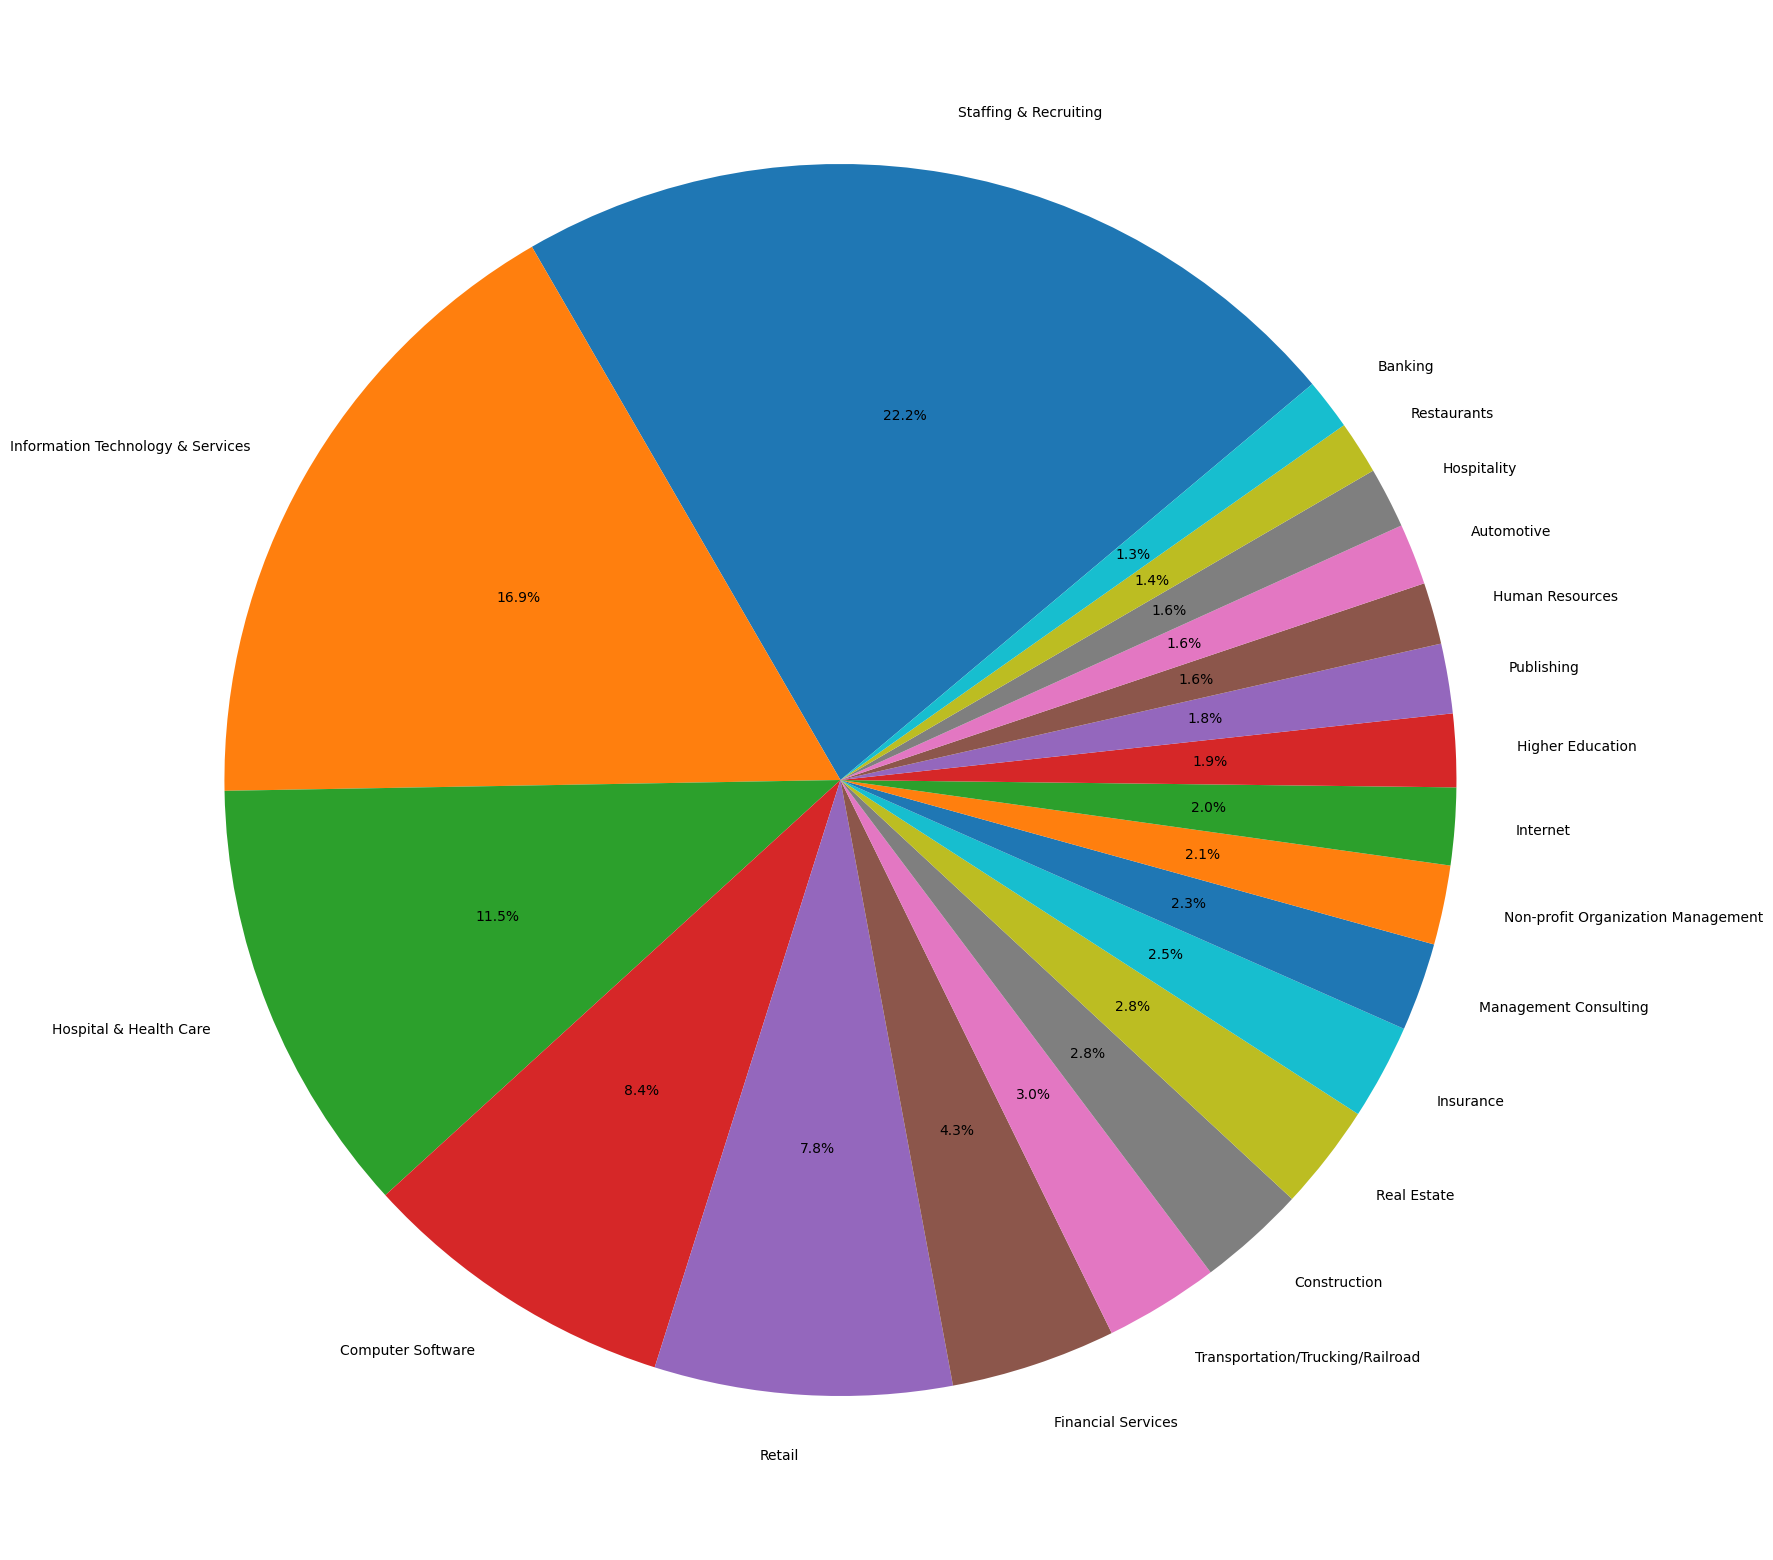

In [40]:
print(bigdata.columns)
job_title_counts = bigdata['title'].value_counts()
print(len(job_title_counts))
#greater than 25 jobs
#industry_counts = industry_counts[industry_counts>25]

job_title_counts = job_title_counts[0:20]

#fig, axes =  plt.subplots(1,figsize=(20, 16))
fig, axes =  plt.subplots(1,figsize=(10, 6))

bars = job_title_counts.plot(kind='barh', ax=axes)

# for i, value in enumerate(value_counts):
#     bars.text(i, value + 0.1, str(value), ha='center', va='bottom')
    
fig, axes =  plt.subplots(1,figsize=(20, 20))
bars = industry_counts.plot(kind='pie', autopct='%1.1f%%', startangle=40, ax=axes)
axes.set_ylabel('')

133


Text(0, 0.5, '')

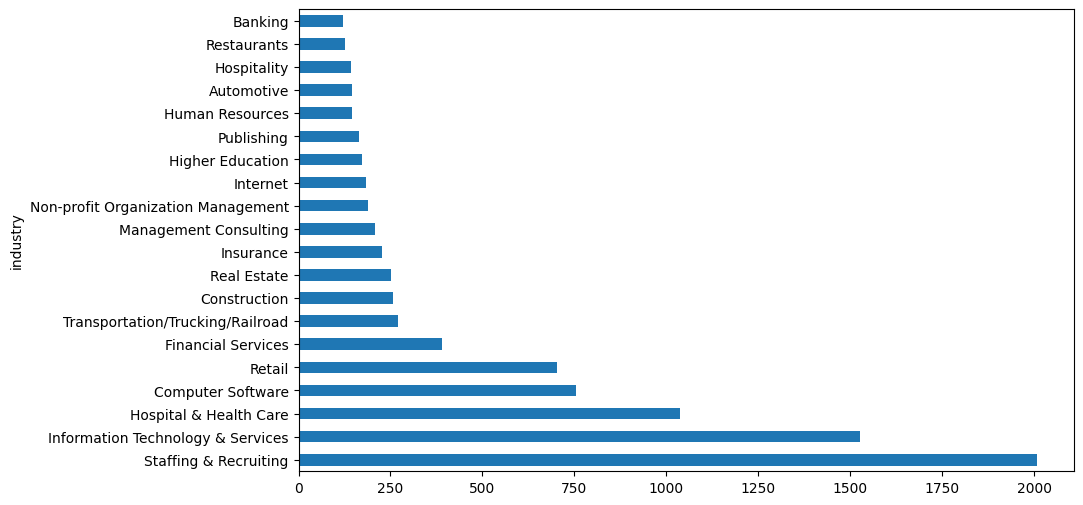

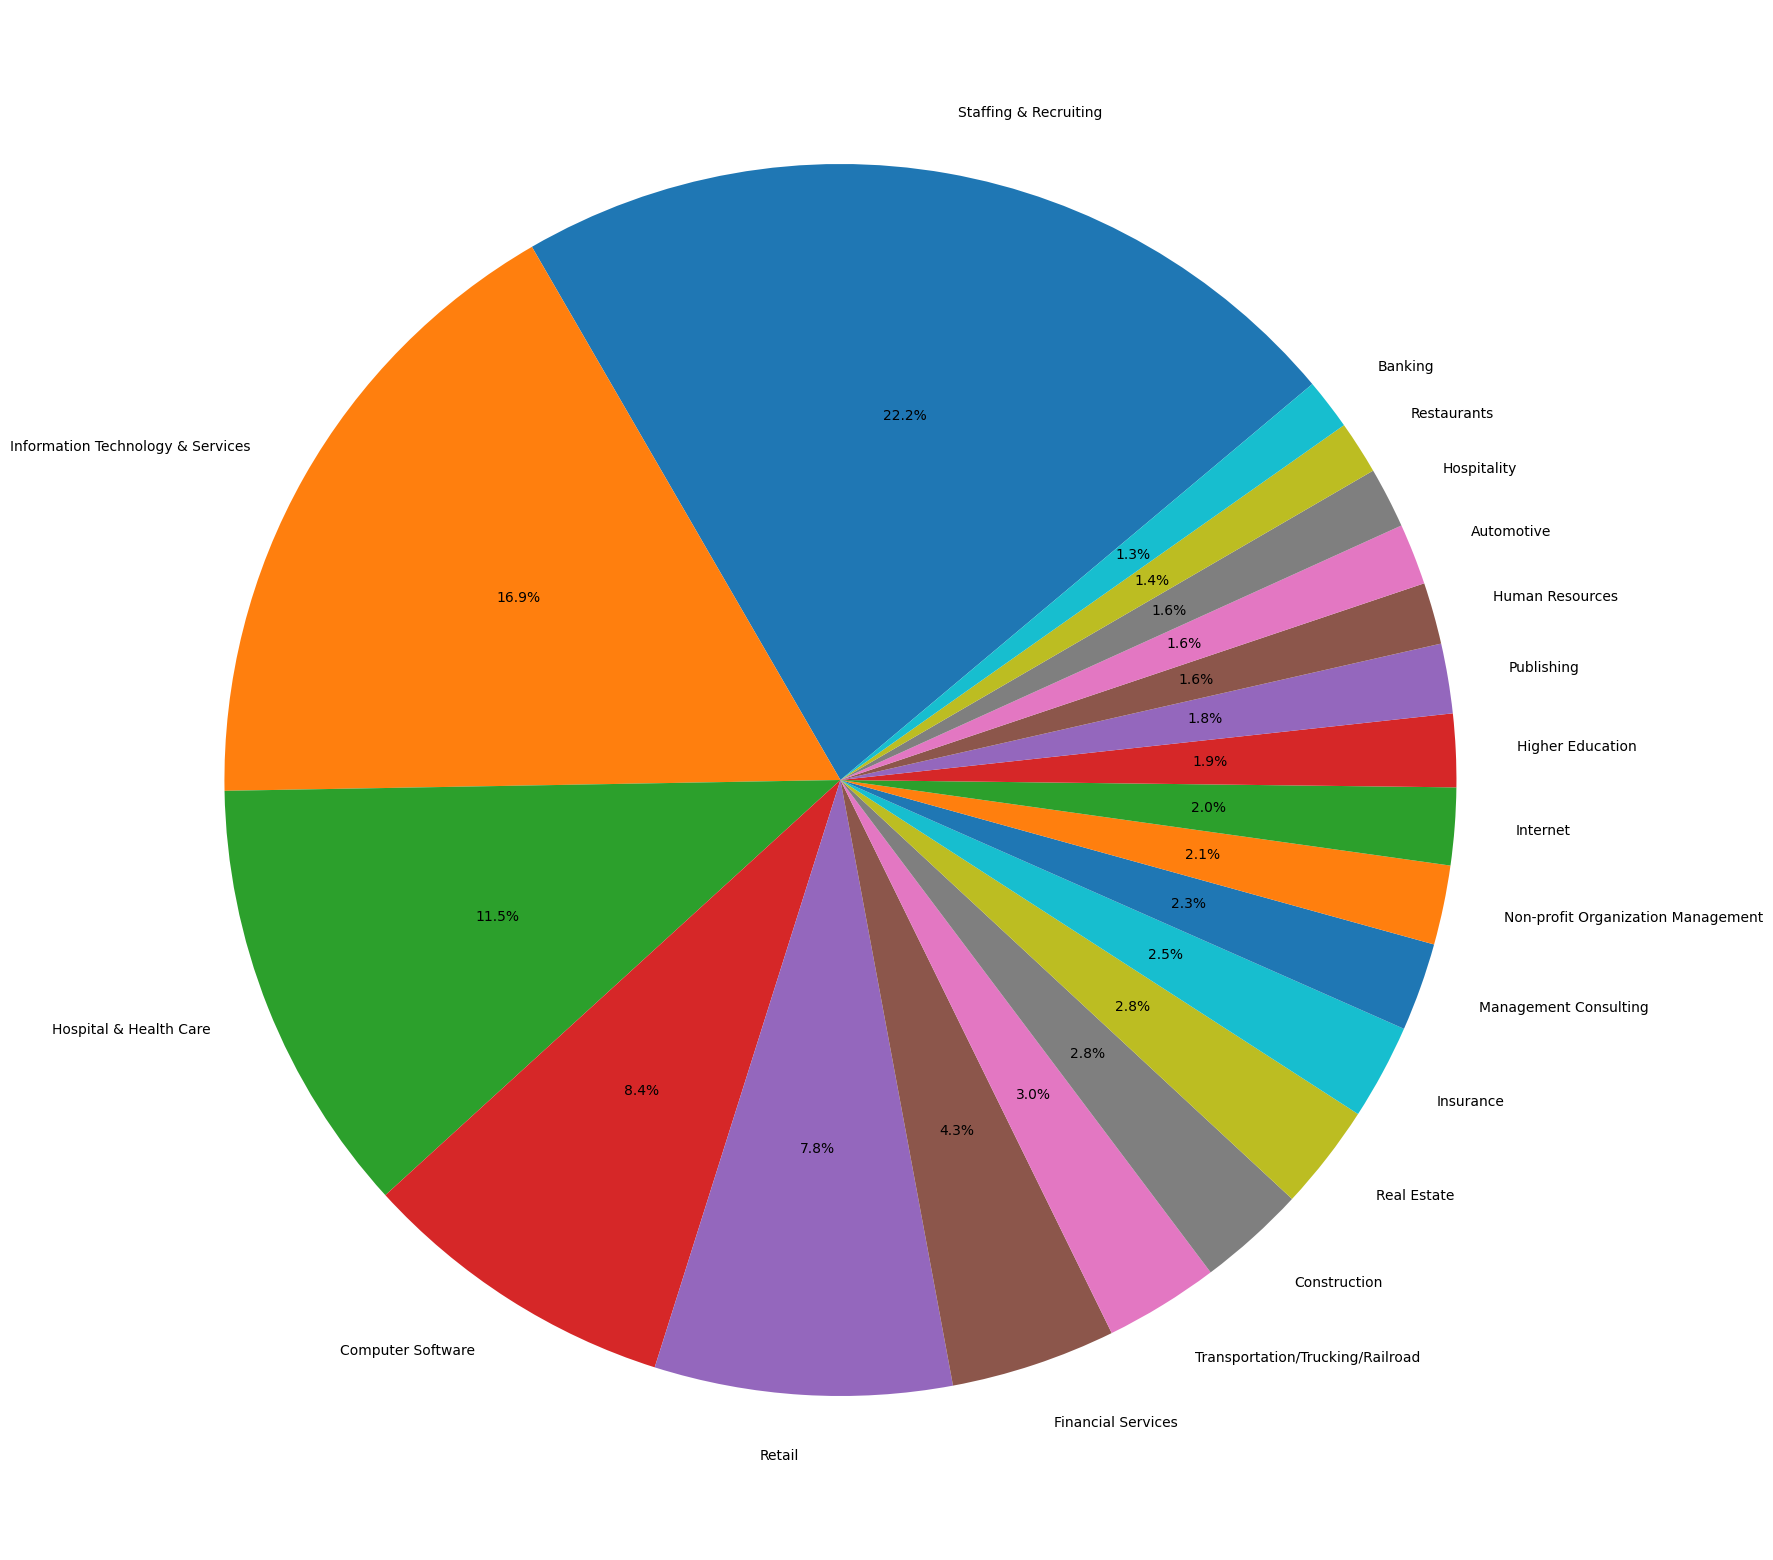

In [37]:
industry_counts = bigdata['industry'].value_counts()
print(len(industry_counts))
#greater than 25 jobs
#industry_counts = industry_counts[industry_counts>25]

industry_counts = industry_counts[0:20]

#fig, axes =  plt.subplots(1,figsize=(20, 16))
fig, axes =  plt.subplots(1,figsize=(10, 6))

bars = industry_counts.plot(kind='barh', ax=axes)

# for i, value in enumerate(value_counts):
#     bars.text(i, value + 0.1, str(value), ha='center', va='bottom')
    
fig, axes =  plt.subplots(1,figsize=(20, 20))
bars = industry_counts.plot(kind='pie', autopct='%1.1f%%', startangle=40, ax=axes)
axes.set_ylabel('')

# Let's zoom in on the smaller pie, before jumping into sector salaries. Less than 25 Jobs

<Axes: ylabel='count'>

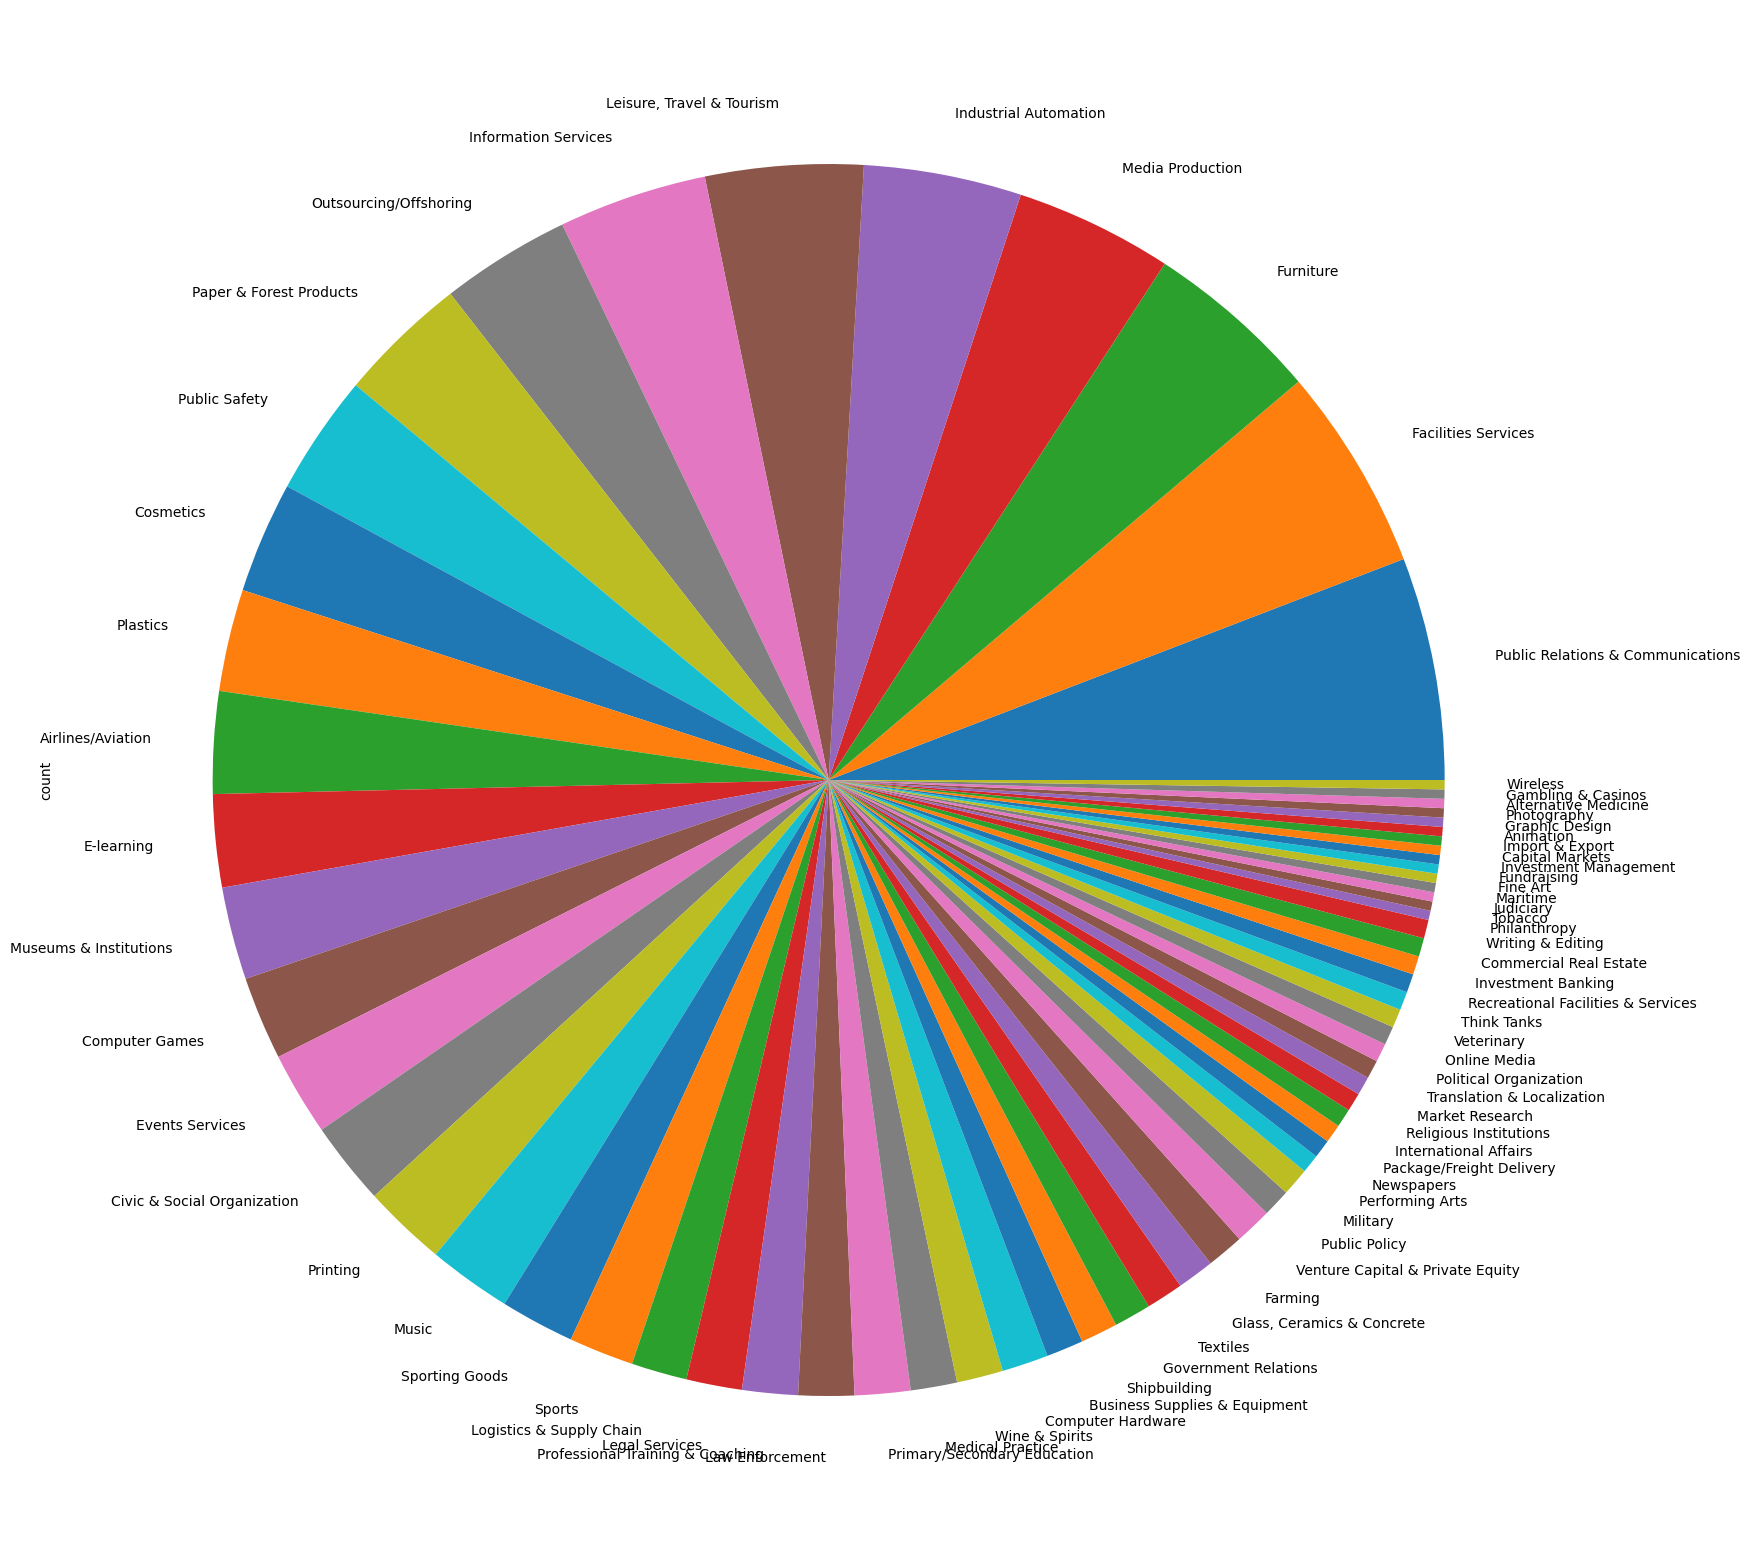

In [42]:
c =  bigdata['industry'].value_counts()
c.to_csv('debug/pre_llm_sectors.csv', index=True)
c = c[ c < 25]
fig, axes = plt.subplots(1,1, figsize=(20,20))
c.plot(kind="pie",ax=axes)

# Get all the unique staffing company names.

In [29]:
 recruiter_jobs =bigdata[ bigdata['industry']=='Staffing & Recruiting' ]
 pd.set_option('display.max_colwidth', 50)

In [30]:
recruiter_jobs.sample(3)

,job_id,company_id,title,description_x,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,applies,original_listed_time,remote_allowed,views,job_posting_url,application_url,application_type,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,name,description_y,company_size,state,country,city,zip_code,address,url,employee_count,follower_count,time_recorded,industry,specialty
10912,3699084295,19189206.0,Mortgage Recruiter,Our client is seeking an Experienced Part or F...,NaN,NaN,NaN,NaN,Contract,United States,23.0,1692833688000,1.0,215.0,https://www.linkedin.com/jobs/view/3699084295/...,NaN,ComplexOnsiteApply,1708385667000,NaN,NaN,NaN,1692833688000,NaN,0,CONTRACT,NaN,NaN,Serendipity Staffing Solutions,Welcome to Serendipity Staffing Solutions. We ...,NaN,Idaho,US,Post Falls,83854,784 S Clearwater Loop,https://www.linkedin.com/company/serendipityst...,2.0,2598.0,1.692858e+09,Staffing & Recruiting,"mortgage, recruiting, staffing, Talent Acquisi..."
11569,3699404074,14542824.0,OH - RN Emergency Room - 7pm to 7am,We are looking for an ER Nurse that has at lea...,NaN,NaN,NaN,NaN,Full-time,"Cincinnati, OH",NaN,1692838065000,NaN,NaN,https://www.linkedin.com/jobs/view/3699404074/...,https://www.trioptushealth.com/career?job_id=z...,OffsiteApply,1695430984000,NaN,Mid-Senior level,NaN,1692838984000,www.trioptushealth.com,0,FULL_TIME,NaN,NaN,TriOptus,TriOptus emerged to create and deliver innovat...,2.0,Maryland,US,Clarksburg,20871,24018 Burnt Hill Rd,https://www.linkedin.com/company/trioptus,98.0,24844.0,1.692844e+09,Staffing & Recruiting,"Workforce Solutions, RPO, BPO, Executive Searc..."
13292,3701301491,51701268.0,SAP TMS Consultant- CONTRACT,Job Title: SAP TMS Consultant- CONTRACTLocatio...,NaN,NaN,NaN,NaN,Contract,"Sunnyvale, CA",2.0,1692731673000,NaN,49.0,https://www.linkedin.com/jobs/view/3701301491/...,NaN,ComplexOnsiteApply,1695323673000,NaN,Mid-Senior level,NaN,1692731673000,NaN,1,CONTRACT,NaN,NaN,Talent Group,Talent Group is a leading IT and Professional ...,3.0,Texas,US,Houston,77024,0,https://www.linkedin.com/company/talentgroup-s...,214.0,116999.0,1.692855e+09,Staffing & Recruiting,"Methodology and Enterprise Architecture, Appli..."


In [31]:
recruiter_job_counts = recruiter_jobs['name'].value_counts()
recruiter_job_counts[recruiter_job_counts>10]

name
Insight Global                     108
Robert Half                         56
Vaco                                50
Jobot                               47
W3Global                            42
Eastridge Workforce Solutions       31
TriOptus                            27
Aya Healthcare                      26
gpac                                24
Randstad USA                        23
eTeam                               20
Atrium                              20
Experis                             20
Nurse First Travel Agency           19
24 Seven Talent                     18
Brightpath Associates LLC           17
US Tech Solutions                   17
HealthCare Support                  17
The Judge Group                     17
DocCafe                             16
Russell Tobin                       14
Beacon Hill Staffing Group          14
Hays                                13
Piper Companies                     13
TekWissen ®                         13
Career Group        

# Let's do the same for tech sector

In [32]:
tech_jobs = bigdata[ bigdata['industry']=='Information Technology & Services' ]

tech_job_counts = tech_jobs['name'].value_counts()
tech_job_counts[tech_job_counts>5]



name
Verizon                          113
Booz Allen Hamilton               70
Milestone Technologies, Inc.      37
Appen                             31
Apex Systems                      26
Crossover                         23
Mastercard                        20
Compunnel Inc.                    18
LanceSoft, Inc.                   17
NLB Services                      16
IBM                               16
V-Soft Consulting Group, Inc.     15
Aditi Consulting                  14
Wipro                             12
Selby Jennings                    12
VDart                             11
DSJ Global                        11
Confidential                      11
E-Solutions                       11
VySystems                         11
Tata Consultancy Services         10
Optomi                            10
Innova Solutions                  10
Photon                             9
LTIMindtree                        9
Zillion Technologies, Inc.         9
Evoque                           

# Lets explore the language of tech


In [33]:
tech_jobs.iloc[0]

job_id                                                               2148434686
company_id                                                               1318.0
title                                                             Administrator
description_x                 About Wipro:\n\nWipro Limited (NYSE: WIT, BSE:...
max_salary                                                                  NaN
med_salary                                                                  NaN
min_salary                                                                  NaN
pay_period                                                                  NaN
formatted_work_type                                                   Full-time
location                                                        Minneapolis, MN
applies                                                                     NaN
original_listed_time                                              1692854059000
remote_allowed                          

1021
1528 


<Axes: xlabel='max_salary', ylabel='title'>

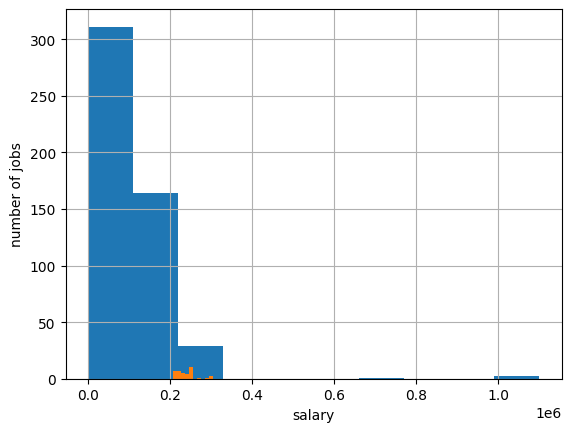

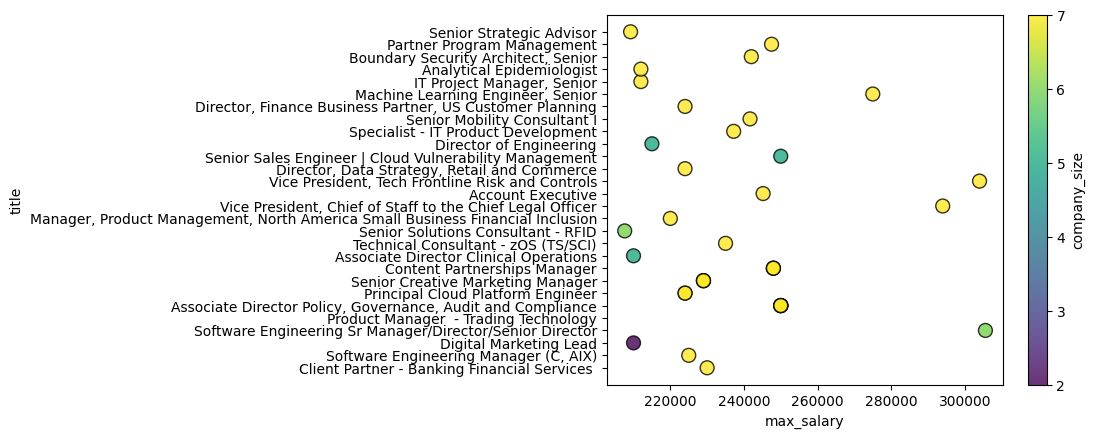

In [34]:
techpay  =   tech_jobs['max_salary']
print(tech_jobs['max_salary'].isna().sum())
print(len(techpay), '')
len(tech_jobs)
techpaychart = tech_jobs['max_salary'].hist()
techpaychart.set_ylabel('number of jobs')
techpaychart.set_xlabel('salary')

good_paying = tech_jobs[  ( tech_jobs['max_salary'] > 200000)  &  (tech_jobs['max_salary'] < 400000)  ] 
good_paying['max_salary'].hist()
good_paying[ ['max_salary','title','company_size'] ].plot.scatter(x='max_salary', y='title', c="company_size",   colormap='viridis', s=100, alpha=0.8, marker='o', edgecolor='black')


# Let's do a keyword search

In [35]:
keywords = ['urgent']
bigdata['description_x'].fillna('', inplace=True)
print(bigdata.head())
result = bigdata[ bigdata['description_x'].str.contains('python') ]
result.head(10)
pd.set_option('display.max_colwidth', None)
job_desc = result[ result['job_id']==3693046445]['description_x'].to_string(index=False)

      job_id  company_id                     title  \
0   85008768         NaN  Licensed Insurance Agent   
1  133114754  77766802.0             Sales Manager   
2  133196985   1089558.0        Model Risk Auditor   
3  381055942  96654609.0          Business Manager   
4  529257371   1244539.0       NY Studio Assistant   

                                       description_x  max_salary  med_salary  \
0  While many industries were hurt by the last fe...     52000.0         NaN   
1  Are you a dynamic and creative marketing profe...         NaN         NaN   
2  Join Us as a Model Risk Auditor – Showcase You...         NaN         NaN   
3  Business ManagerFirst Baptist Church ForneyFor...         NaN         NaN   
4  YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...         NaN         NaN   

   min_salary pay_period formatted_work_type           location  applies  \
0     45760.0     YEARLY           Full-time          Chico, CA      NaN   
1         NaN        NaN           Full-ti

# Do this for all tomorrow and get the freq dist of the NNP form techjobs,  we should be able to select from that frequency.

In [36]:
result['description_x']

796                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [37]:
from nltk import word_tokenize
tokenized_job = word_tokenize(job_desc)
nltk.help.upenn_tagset('NNP')
[  tup[0]  for tup in nltk.pos_tag(tokenized_job ) if tup[1] == 'NNP' ]



NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...


['Senior',
 'Site',
 'Reliability',
 'Engineer',
 'Database',
 'Engineering',
 'Grubhub',
 'Database',
 'Engineering',
 'Datastore',
 'Cassandra',
 'ElasticSearch',
 'Kafka',
 'Impact',
 'Cassandra',
 'Elasticsearch',
 'GrubHub',
 'SLO',
 'Test',
 'Cassandra',
 'ES',
 'DR',
 'GrubHub',
 'Elasticsearch/Cassandra',
 'TableExperience',
 'Python',
 'JavaExperience',
 'Elasticsearch',
 'Python',
 'Ansible',
 'AWS',
 'Cassandra',
 'Python.Most',
 'JavaObservability',
 'Splunk',
 'Lightstep.Our',
 'CassandraWe',
 'Amazon',
 'AWS',
 'EC2',
 'S3',
 'SNS/SQS',
 'ElastiCache',
 'Lambda',
 'York',
 'Salary',
 'Range',
 'Base',
 'Pay',
 'Rewards',
 'Rewards',
 'Rewards',
 'Course',
 'Perks',
 'PTO',
 'Grubhub',
 'Wellness',
 'Excellent',
 'RSUs',
 'Grubhub',
 'Impact',
 'Grubhub',
 'Community',
 'Relief',
 'Fund',
 'U.S.',
 'TalentAcquisition',
 '@',
 'Privacy',
 'Notice',
 'State',
 'California',
 'CA',
 '@']